# Ford GoBike System Data Exploration 

## by Sarah Alamri

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Gather

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Assess

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.shape

(183412, 16)

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
df.describe(include='O')

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip
count,183412,183412,183215,183215,183412,175147,183412
unique,183401,183397,329,329,2,3,2
top,2019-02-01 13:40:09.4920,2019-02-28 17:40:37.3280,Market St at 10th St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,Male,No
freq,2,2,3904,4857,163544,130651,166053


In [97]:
df.isnull().sum()

duration_min               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_age                 0
member_gender              0
bike_share_for_all_trip    0
start_day                  0
start_hour                 0
end_hour                   0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [12]:
df.query('member_gender == "Other"').count()

duration_sec               3652
start_time                 3652
end_time                   3652
start_station_id           3647
start_station_name         3647
start_station_latitude     3652
start_station_longitude    3652
end_station_id             3647
end_station_name           3647
end_station_latitude       3652
end_station_longitude      3652
bike_id                    3652
user_type                  3652
member_birth_year          3652
member_gender              3652
bike_share_for_all_trip    3652
dtype: int64

### Clean

- chang incorrect datatypes
- drop null val
- convert duration_sec to duration_min
- convert member_birth_year to member_age
- drop "other" from member_gender
- Determine the started day of the week
- Extracting the start and end hour
- drop unuseful columns 

In [13]:
df.start_time = pd.to_datetime(df.start_time)

In [14]:
df.end_time = pd.to_datetime(df.end_time)

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [17]:
df.shape

(174952, 16)

In [18]:
df.loc[ : ,'duration_sec'] = df['duration_sec']/60

In [19]:
df.rename(columns={'duration_sec': 'duration_min'}, inplace=True)

In [20]:
df.loc[ : ,'member_birth_year'] = 2021 - df['member_birth_year']

In [21]:
df.rename(columns={'member_birth_year': 'member_age'}, inplace=True)

In [22]:
df.member_age = df.member_age.astype('int64')

In [23]:
df.duration_min = df.duration_min.astype('int64')

In [24]:
other = df[df['member_gender']=='Other'].index
df = df.drop(index=other)

In [25]:
df.member_gender.unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df['start_day'] = df.start_time.dt.strftime('%a')

In [27]:
df.start_day.unique()

array(['Thu', 'Wed', 'Tue', 'Mon', 'Sun', 'Sat', 'Fri'], dtype=object)

In [28]:
df['start_day'].value_counts()

Thu    32984
Tue    30022
Wed    27825
Fri    27083
Mon    25106
Sun    14183
Sat    14102
Name: start_day, dtype: int64

In [29]:
df['start_hour'] = df.start_time.dt.strftime('%H')

In [30]:
df['start_hour'].value_counts()

17    20497
08    19881
18    15785
09    14907
16    13196
07    10055
19     9210
15     8468
12     8020
13     7906
10     7759
14     7494
11     7298
20     6085
21     4291
06     3258
22     2720
23     1530
00      869
05      860
01      509
02      340
04      215
03      152
Name: start_hour, dtype: int64

In [31]:
df['end_hour'] = df.end_time.dt.strftime('%H')

In [33]:
df['end_hour'].value_counts()

17    19938
08    18678
18    17121
09    16675
16    12266
19     9988
07     8315
10     8304
15     8104
12     7937
13     7900
14     7510
11     7055
20     6479
21     4598
22     3016
06     2769
23     1703
00      938
05      734
01      524
02      385
04      212
03      156
Name: end_hour, dtype: int64

In [34]:
df=df.drop(columns=['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude'])

In [35]:
df.head(50)

,duration_min,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,start_day,start_hour,end_hour
0,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,37,Male,No,Thu,17,08
2,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,49,Male,No,Thu,12,05
4,26,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,47,Male,Yes,Thu,23,00
5,29,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,62,Male,No,Thu,23,00
6,19,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,38,Female,No,Thu,23,00
7,26,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,32,Male,No,Thu,23,00
9,17,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,Mission Playground,6488,Subscriber,29,Male,No,Thu,23,00
10,7,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,25,Female,Yes,Thu,23,00
11,8,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,Civic Center/UN Plaza BART Station (Market St ...,Bryant St at 2nd St,5848,Subscriber,28,Male,No,Thu,23,00
12,19,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,Valencia St at 21st St,Broadway at Kearny,5328,Customer,31,Male,No,Thu,23,00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171305 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             171305 non-null  int64         
 1   start_time               171305 non-null  datetime64[ns]
 2   end_time                 171305 non-null  datetime64[ns]
 3   start_station_name       171305 non-null  object        
 4   end_station_name         171305 non-null  object        
 5   bike_id                  171305 non-null  int64         
 6   user_type                171305 non-null  object        
 7   member_age               171305 non-null  int64         
 8   member_gender            171305 non-null  object        
 9   bike_share_for_all_trip  171305 non-null  object        
 10  start_day                171305 non-null  object        
 11  start_hour               171305 non-null  object        
 12  end_hour        

In [37]:
df.shape

(171305, 13)

### What is the structure of your dataset?

> There are 171305 rows in the dataset with 13 feature (duration_min,start_time,end_time,start_station_name,end_station_name,	bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,start_day,start_hour,end_hour )



### What is/are the main feature(s) of interest in your dataset?

> In this dataset that contain 13 featuer there is some feature we need to foucs on it like duration of trip ,  user_type , start_hour , member_gender ,member_age ,start_day

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>user type , member_birth_year , end_time , start_time ,duration_min ,start_hour,end_hour ,start_day


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

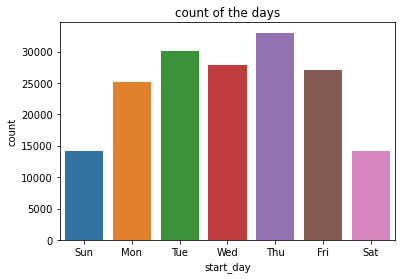

In [133]:
#count of the day to using the bike
sb.countplot(data=df, x='start_day',order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']);
plt.title("count of the days");


Observation:The most days to use the bike on Thursday and Friday

In [129]:
#function 
def plotFun(plt, title, xLabel, yLabel):
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

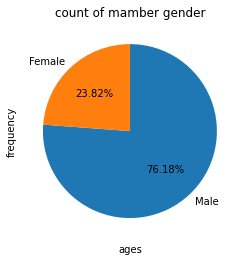

In [130]:
#sort the counts of the gender values from largest to smallest

sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%.2f%%', counterclock = False);
plotFun(plt,'count of mamber gender','ages','frequency')

Observation: Most bike users are 76.18% male.

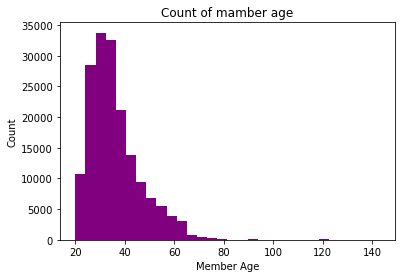

In [134]:
#users age
plt.hist(data = df, x = 'member_age',bins =30,color='purple');
plotFun(plt,'Count of mamber age','Member Age','Count');

Observation: Most bike users are between 25 and 35 years old

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Age distribution: Most of the users ranged in age from 25 to 35
- As for the gender distribution, the rate of males was much higher than females
- The distribution of days during the use of the bike was uneven, but the largest percentage is on Thursday and Friday
There was no need to transformations , except to convert the duration from seconds to minutes, and this was in the cleaning


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I cleaned up the datasets and their features in order to get better visualizations, extracted some columns, deleted some and changed the duration from seconds to minutes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

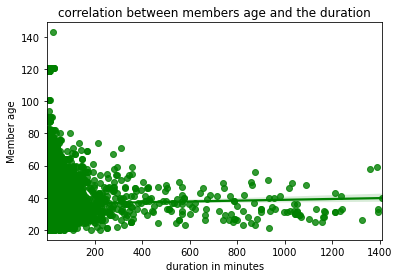

In [137]:
#Relationship between members age and the duration 
sb.regplot(data = df, x = 'duration_min', y = 'member_age' , color='green');
plotFun(plt,'correlation between members age and the duration','duration in minutes','Member age');

observation: The ages are between 20 to 55 at the time of their use much more than the older ones

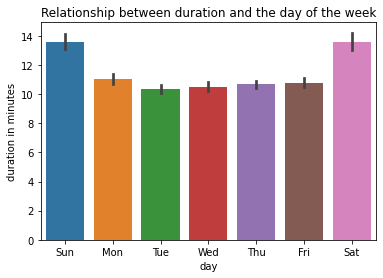

In [148]:
#Relationship between duration and the day of the week
sb.barplot(data = df, x = 'start_day', y = 'duration_min', order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'] );
plotFun(plt,'Relationship between duration and the day of the week','day','duration in minutes')

Observation: On Saturday and Sunday, the duration of use is more than the rest of the week

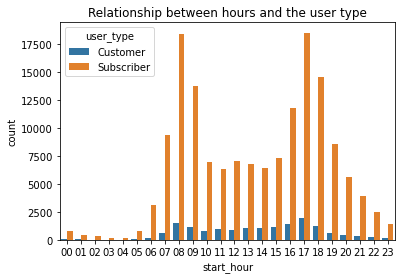

In [150]:
#Relationship between hours and the user type
sb.countplot(data = df, x = 'start_hour', hue = 'user_type' , order = ['00','01', '02', '03', '04', '05', '06', '07','08', '09', '10', '11', '12', '13','14', '15', '16', '17', '18', '19', '20', '21', '22', '23' ]);
plt.title('Relationship between hours and the user type');


The hours of use of subscribers are much greater than the hours of use of customers, and also the most hours in which the use increases are at 8 am and 17 pm.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The ages are between 20 to 55 at the time of their use much more than the older ones and on Saturday and Sunday, the duration of use is more than the rest of the week and also
The hours of use of subscribers are much greater than the hours of use of customers, and also the most hours in which the use increases are at 8 am and 17 pm because of the work time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Over the week, subscribers and costumers used bikes most on Sundays and Saturdays.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<AxesSubplot:>

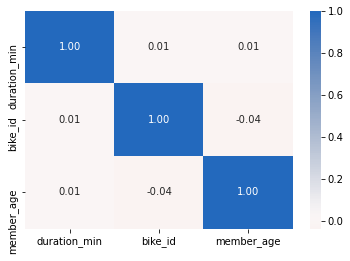

In [85]:
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)


Here, as we can see, all the numbers are far from 1, so there is no Correlation between these three features

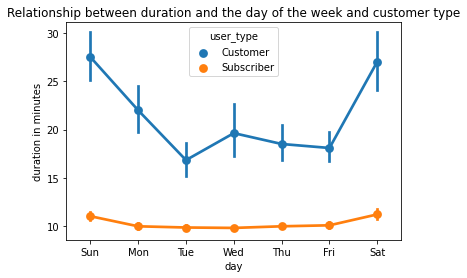

In [143]:
#Relationship between duration and the day of the week and customer type
sb.pointplot(data=df, x='start_day', y='duration_min', hue='user_type',order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']);
plotFun(plt,'Relationship between duration and the day of the week and customer type','day','duration in minutes')

In the above plot, subscribers ride significantly shorter trips than customers every day of the week. 
The trip duration of customers and subscribers over weekends is significantly longer on Saturdays and Sundays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> During the exploration, clear relationships and patterns emerged, such as that the time buyers use the bike is almost fixed, and the working hours are usually and the most hours of use are 8 and 17, which is the time for going and returning from work, while the customers have different distribution of time and the duration of their use is much more than the subscribers.

### Were there any interesting or surprising interactions between features?

> Almost every relationship made sense and was unsurprising

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [96]:
df.to_csv('Master-fordgobike-tripdata.csv', index=False)